<a href="https://colab.research.google.com/github/BenJoshMudi/GOMYCODE.BEN/blob/main/Microsoft_malware_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT NECESSARY LIBRARIES**

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


**LOADING THE MICROSOFT  MALWARE DATASET**

In [76]:
df = pd.read_csv("Microsoft_malware_dataset_min.csv")
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29.0
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93.0
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86.0
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88.0
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18.0


**GENERAL INFORMATION ABOUT THE DATASET**

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49128 entries, 0 to 49127
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HasDetections               49128 non-null  int64  
 1   Wdft_IsGamer                47463 non-null  float64
 2   Census_IsVirtualDevice      49052 non-null  float64
 3   Census_OSEdition            49128 non-null  object 
 4   Census_HasOpticalDiskDrive  49128 non-null  int64  
 5   Firewall                    48582 non-null  float64
 6   SMode                       46196 non-null  float64
 7   IsProtected                 48940 non-null  float64
 8   OsPlatformSubRelease        49127 non-null  object 
 9   CountryIdentifier           49127 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 3.7+ MB


**CHECK FOR MISSING VALUES**

In [78]:
df.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  1665
Census_IsVirtualDevice          76
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                       546
SMode                         2932
IsProtected                    188
OsPlatformSubRelease             1
CountryIdentifier                1
dtype: int64

***DROP MISSING VALUES ***

In [79]:
df.dropna(inplace=True)

In [80]:
df.isnull().sum()

HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43949 entries, 0 to 49126
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HasDetections               43949 non-null  int64  
 1   Wdft_IsGamer                43949 non-null  float64
 2   Census_IsVirtualDevice      43949 non-null  float64
 3   Census_OSEdition            43949 non-null  object 
 4   Census_HasOpticalDiskDrive  43949 non-null  int64  
 5   Firewall                    43949 non-null  float64
 6   SMode                       43949 non-null  float64
 7   IsProtected                 43949 non-null  float64
 8   OsPlatformSubRelease        43949 non-null  object 
 9   CountryIdentifier           43949 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 3.7+ MB


**SELECTING RELEVANT FEATURES FROM THE DATASET**

In [82]:
X = df.drop(['HasDetections', 'CountryIdentifier'], axis =1)
y = df['HasDetections']

**ENCODING CAREGORICAL VARIABLES**

In [83]:
le = LabelEncoder()
X['OsPlatformSubRelease'] = le.fit_transform(X['OsPlatformSubRelease'])
X['Census_OSEdition'] = le.fit_transform(X['Census_OSEdition'])


In [84]:
X.head()

,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease
0,0.0,0.0,10,0,1.0,0.0,1.0,4
1,0.0,0.0,10,0,1.0,0.0,1.0,4
2,0.0,0.0,1,0,1.0,0.0,1.0,4
3,0.0,0.0,10,0,1.0,0.0,1.0,4
4,0.0,0.0,1,0,1.0,0.0,1.0,4


# **APPLYING DECISION TREE ALGORITM WITH ROC CURVE**

In [85]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)
tree =  DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

Accuracy = accuracy_score(y_test,y_pred)
print(Accuracy)

0.543344709897611


**PLOTTING ROC CURVE**

0.5500279741341275


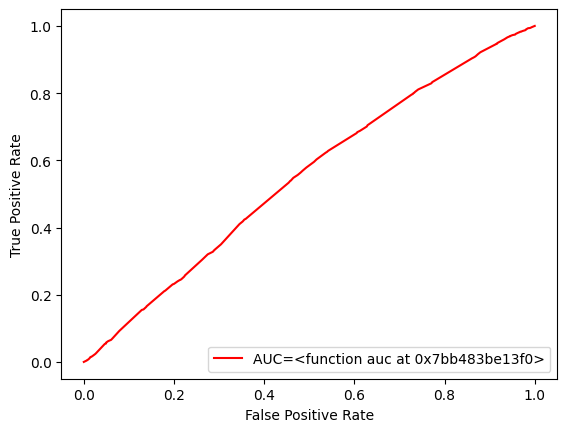

In [109]:
y_pred_proba = tree.predict_proba(X_test)[::,1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(roc_auc)

plt.plot(fpr,tpr,label="AUC="+str(auc), color = 'red')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# **APPLYING KMEANS ALGORITHM**

In [86]:
import sklearn
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

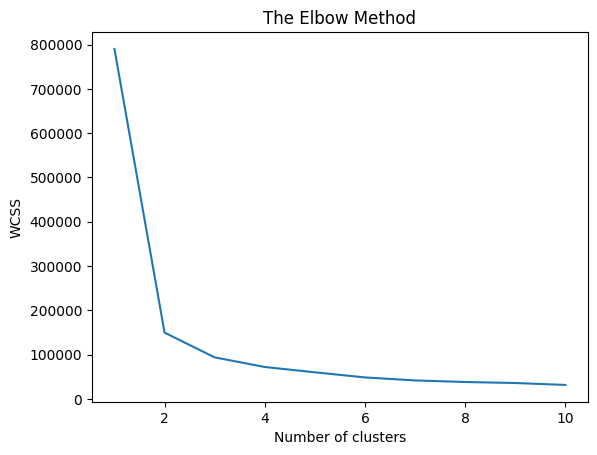

In [108]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [88]:
kmeansmodel = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)
print(y_kmeans)

[1 1 0 ... 1 0 1]


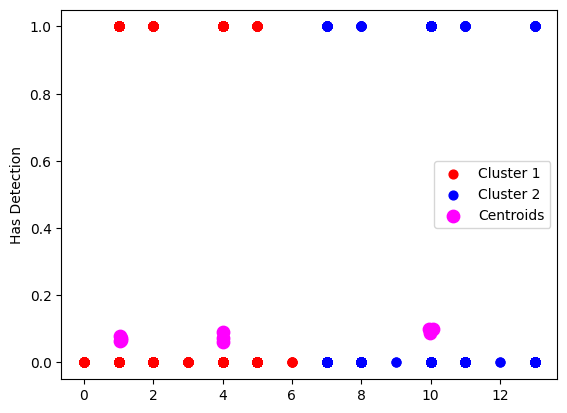

In [89]:
plt.scatter(X.values[y_kmeans == 0, 2], X.values[y_kmeans == 0, 3], s=40, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 2], X.values[y_kmeans == 1, 3], s=40, c='blue', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=80, c='magenta', label='Centroids')
plt.ylabel('Has Detection')
plt.legend()
plt.show()

# **OR USE THIS**

In [100]:
# Create function to work out optimus number of clusters

def optimise_k_means(data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
    import sklearn
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  #Generate the elbow plot
  fig = plt.subplots(figsize=(10,5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()


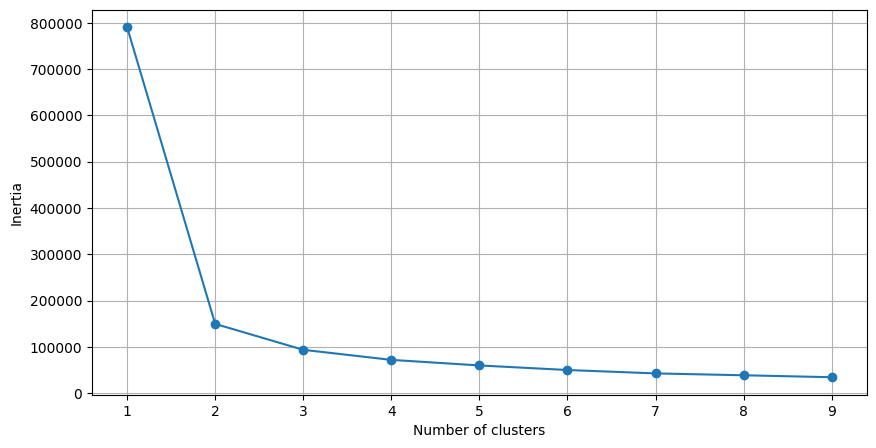

In [101]:
optimise_k_means(X[['Wdft_IsGamer','Census_IsVirtualDevice','Census_OSEdition','Census_HasOpticalDiskDrive', 'Firewall',	'SMode','IsProtected','OsPlatformSubRelease']], 10)

In [106]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit(X)
X['Kmeans=3'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


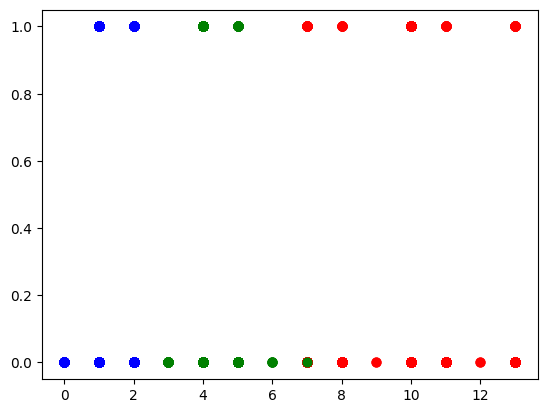

In [107]:
plt.scatter(X.values[y.labels_ == 0, 2], X.values[y.labels_ == 0, 3], s=40, c='red', label='Cluster 1')
plt.scatter(X.values[y.labels_ == 1, 2], X.values[y.labels_ == 1, 3], s=40, c='blue', label='Cluster 2')
plt.scatter(X.values[y.labels_ == 2, 2], X.values[y.labels_ == 2, 3], s=40, c='green', label='Cluster 3')